In [ ]:
# Import Simulation Class
import sys
sys.path.append('..')  # Add parent directory to the system path
from ESR_STM_SpinSimulation import SpinSys
import numpy as np
%load_ext autoreload
%autoreload 2

In [ ]:
# Define the Spin System
Spins=[1,0.5]
S = SpinSys(Spins)
S.B=[0,0,0.5]
S.BTip=[1e-7,0,0]
S.tip='f'
S.TipPolarization=[0,0,0.1]
S.T=1
S.Jvector=np.array([[14.65,14.6,14.6]])
S.Dvector=np.array([-1.9,0])
S.AtomPositions=np.array([[0,0,0],[2,1,0]])
S.DipoleBool=[False]
S.V_DC=-100

Basic Spin Calculations

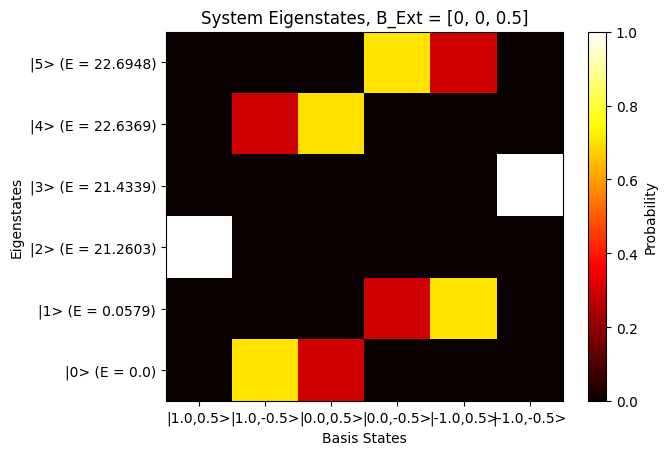

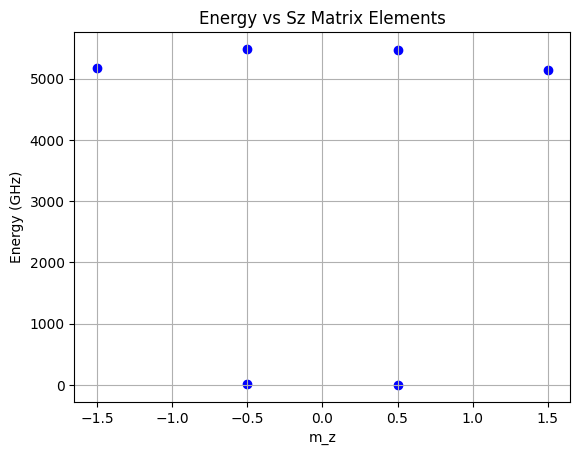

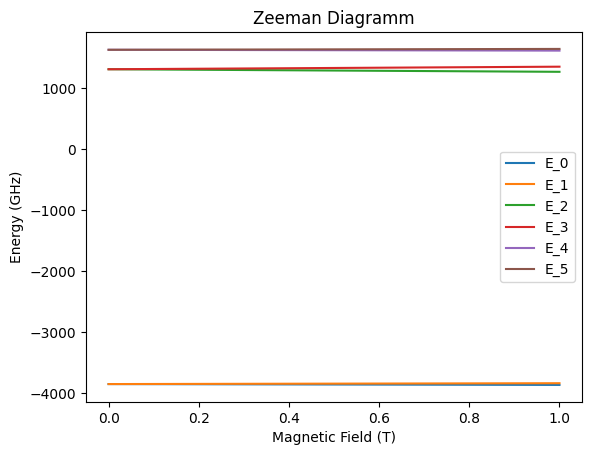

In [4]:
S.calcSpinOperators()
S.calcEigEnergies()
S.calcEigStates()
S.showEigenMatrix('p')
S.plotEnergyVsSz()
S.plotZeemanDiagramm(Brange=[0,1],N=100)

ESR Experiments

In [ ]:
#S.calcESR_Benjamin();
S.ReadoutSpin=0
S.plotESRTipfieldsweep(N_B=500,lw=0.2,BTipLimits=[-0.02,0.02])

dIdV Measurement

IETS0 took 0.0186 seconds
IETS2 took 2.3323 seconds


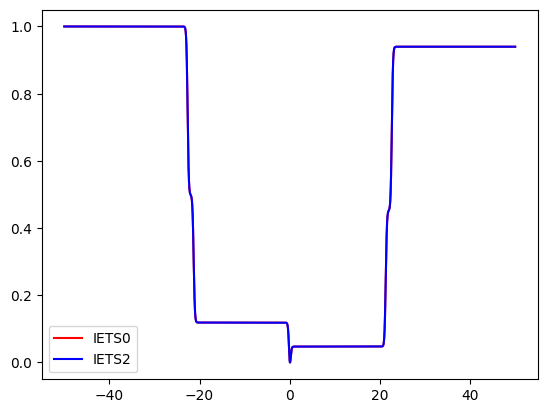

In [31]:
import time
import matplotlib.pyplot as plt
Num=10000
S.T=1
start_time = time.time()
x0,y0 = S.calcIETS_0(N=Num,plot=False,Vrange=50)
print(f"IETS0 took {time.time() - start_time:.4f} seconds")

start_time = time.time()
x2,y2,_ = S.calcIETS_2(AllowPumping=False,N=Num,plot=False,Vrange=50)
print(f"IETS2 took {time.time() - start_time:.4f} seconds")

plt.figure(22)
plt.plot(x0,y0,'r')
plt.plot(x2,y2,'b')
plt.legend(['IETS0','IETS2'])
plt.show()